<a href="https://colab.research.google.com/github/bhaktichowkwale/DataMiningProject/blob/master/EDA_Kirti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df_2016 = pd.read_csv("/content/drive/MyDrive/Datasets for ML/Parking_Violations_Issued_-_Fiscal_Year_2016.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,34,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_2016 = pd.DataFrame(df_2016)

In [ ]:
data_2016.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1363745270,GGY6450,99,PAS,07/09/2015,46,SDN,HONDA,P,0,40404,40404,20170602.0,74.0,74.0,301.0,358160.0,T301,0,1037A,NaN,K,F,142,MACDOUNGH ST,NaN,0.0,408.0,D1,NaN,BBBBBBB,ALL,ALL,WHITE,0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1363745293,KXD355,SC,PAS,07/09/2015,21,SUBN,CHEVR,P,55730,67030,58730,20160288.0,79.0,79.0,301.0,358160.0,T301,0,1206P,NaN,K,F,331,LEXINGTON AVE,NaN,0.0,408.0,F1,NaN,YBBYBBB,1100A,1230P,RED,0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1363745438,JCK7576,PA,PAS,07/09/2015,21,SDN,ME/BE,P,42730,26730,26830,0.0,79.0,79.0,0.0,358114.0,TEBN,0,0820A,NaN,K,F,1087,FULTON ST,NaN,0.0,408.0,D1,NaN,YBBYBBB,0800A,0930A,WHITE,0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1363745475,GYK7658,NY,OMS,07/09/2015,21,SUBN,NISSA,P,58130,18630,67030,0.0,79.0,79.0,301.0,358114.0,T301,0,0918A,NaN,K,F,207,MADISON ST,NaN,0.0,408.0,D1,NaN,YBBYBBB,0900A,1030,BK,0,2015.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1363745487,GMT8141,NY,PAS,07/09/2015,21,P-U,LINCO,P,58130,67030,58730,20160206.0,79.0,79.0,301.0,358114.0,T301,0,0925A,NaN,K,F,237,MADISON ST,NaN,0.0,408.0,D1,NaN,YBBYBBB,0900A,1030A,BLK,0,2006.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_2016.shape

(10626899, 51)

In [ ]:
d = {'Unique Entry': data_2016.nunique(axis = 0),
     'Nan Entry': data_2016.isnull().any(),
     'How many Nan values' : data_2016.isnull().sum()}
info_2016 = pd.DataFrame(data = d, index = data_2016.columns.values)



In [ ]:

print(info_2016)

                                   Unique Entry  Nan Entry  How many Nan values
Summons Number                         10626899      False                    0
Plate ID                                3011042       True                 2164
Registration State                           68      False                    0
Plate Type                                   85      False                    0
Issue Date                                 2246      False                    0
Violation Code                              100      False                    0
Vehicle Body Type                          2145       True                39281
Vehicle Make                               6031       True                63586
Issuing Agency                               17      False                    0
Street Code1                               6465      False                    0
Street Code2                               6770      False                    0
Street Code3                            

NY    8260189
NJ     968839
PA     259177
CT     145153
FL     138647
       ...   
SK         18
FO         13
MX         11
YT          5
NT          2
Name: Registration State, Length: 68, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


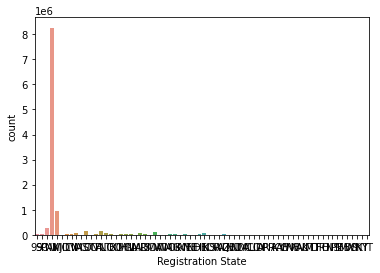

In [ ]:
cntof='Registration State'
print(df_2016[cntof].value_counts())
sns.countplot(df_2016[cntof])
plt.show()

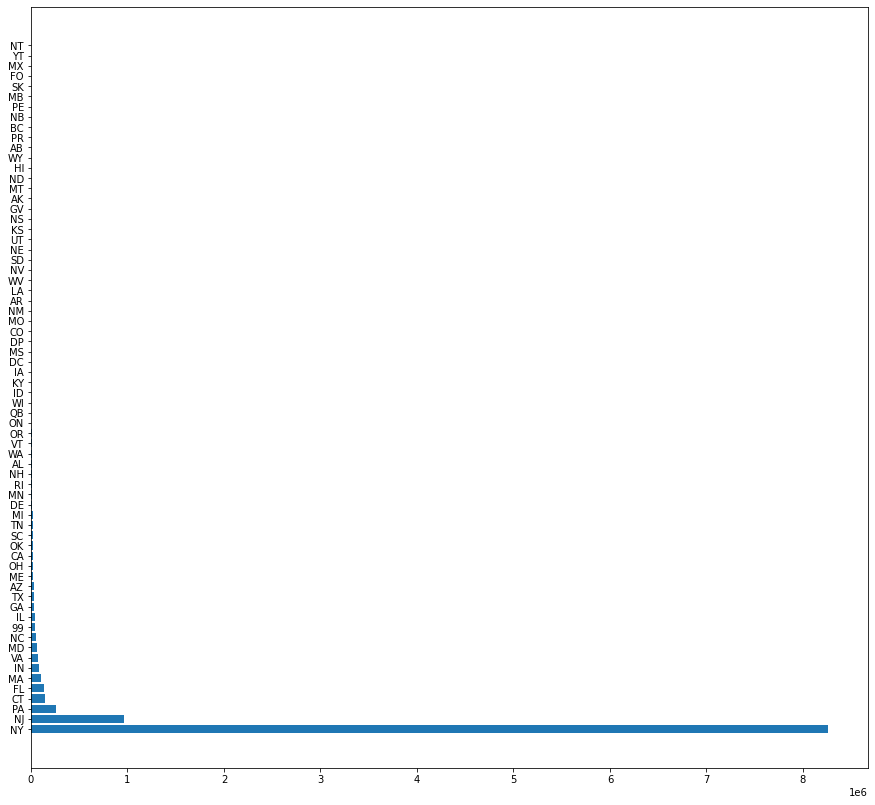

In [ ]:
x_ticks = df_2016['Registration State'].value_counts().index
heights = df_2016['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

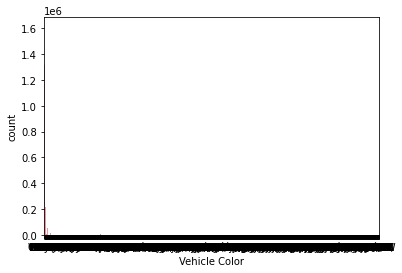

In [ ]:
#fig, axarr = plt.subplots(figsize=(50,20))
sns.countplot(x="Vehicle Color",  data=df_2016);

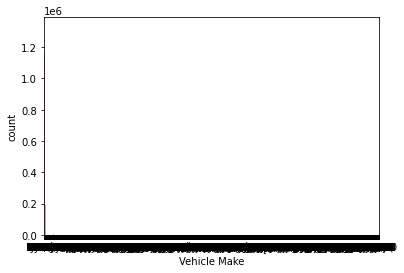

In [ ]:
#fig, axarr = plt.subplots(figsize=(25,10))
sns.countplot(x="Vehicle Make",  data=df_2016);


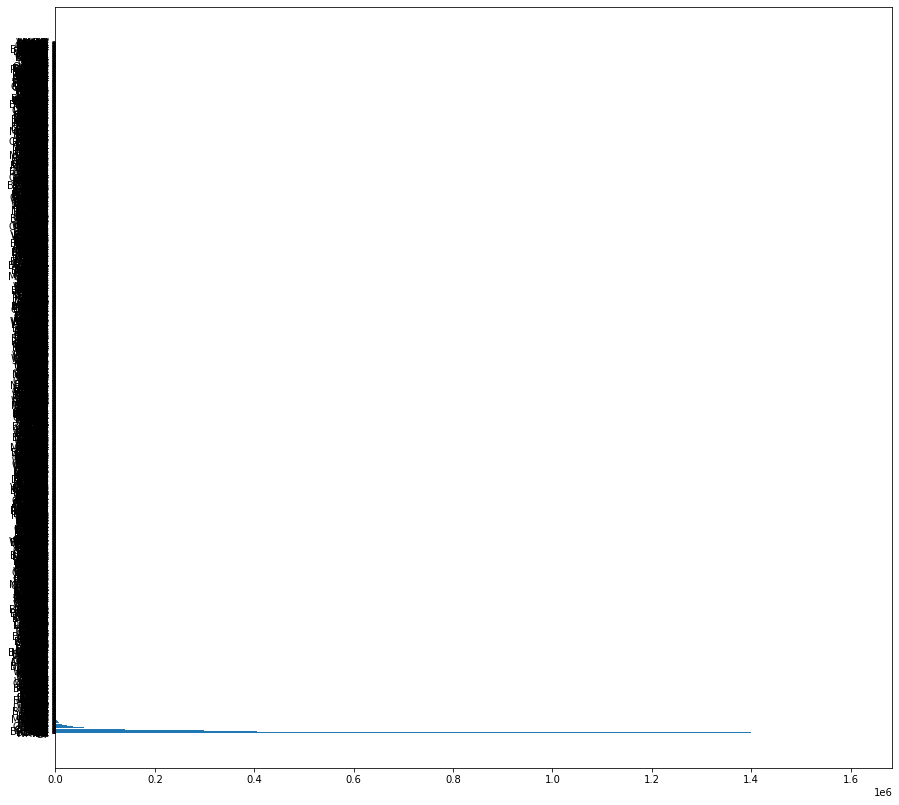

In [ ]:
x_ticks = df_2016['Vehicle Color'].value_counts().index
heights = df_2016['Vehicle Color'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

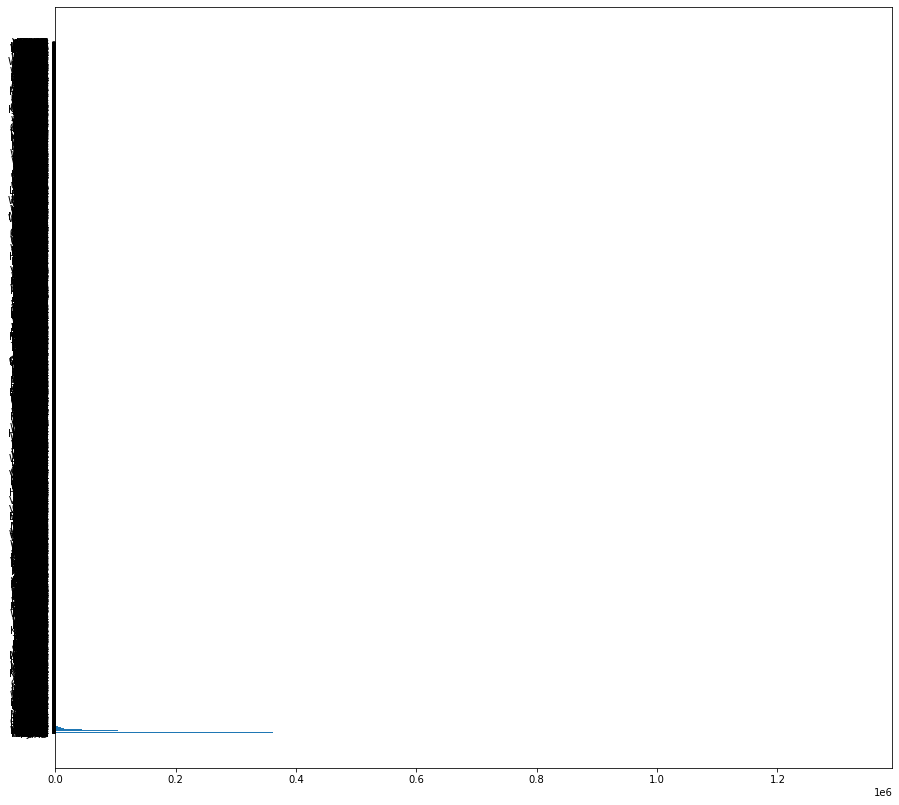

In [ ]:
x_ticks = df_2016['Vehicle Make'].value_counts().index
heights = df_2016['Vehicle Make'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

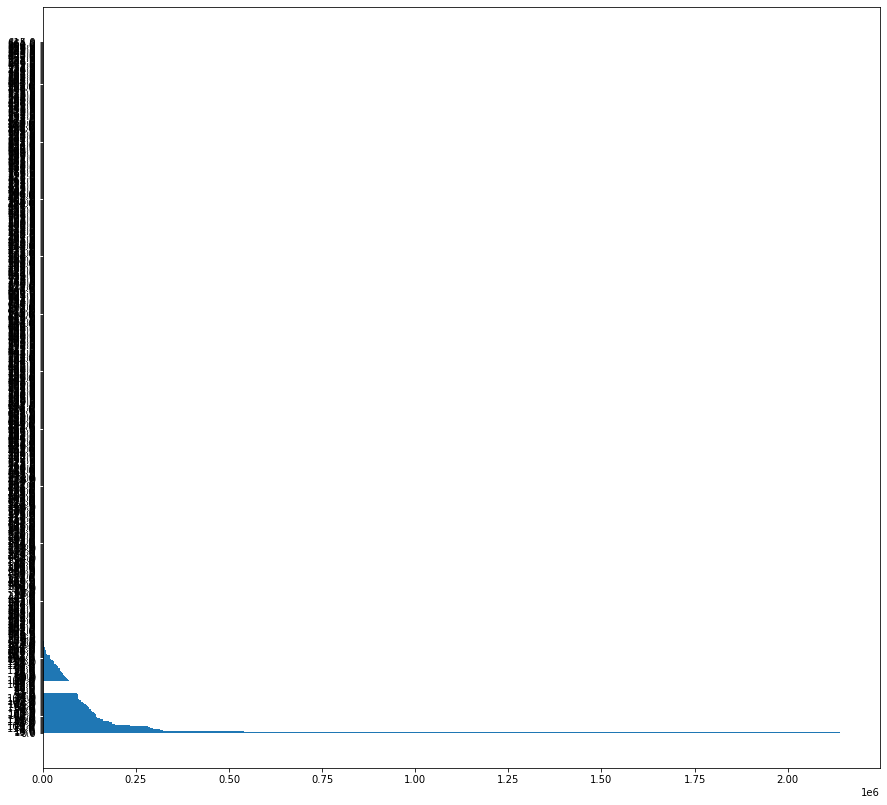

In [ ]:
x_ticks = df_2016['Issuer Precinct'].value_counts().index
heights = df_2016['Issuer Precinct'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

As the plottting of the entire dataset for a year was very large, as sample of tp 10 data in each plot  was used to create visually attractive EDA


# Which state have more tickets issued

In [ ]:
Reg_States_top10 = df_2016['Registration State'].value_counts()[0:10]
Reg_States_top10

NY    8260189
NJ     968839
PA     259177
CT     145153
FL     138647
MA      99115
IN      81141
VA      75093
MD      60240
NC      55629
Name: Registration State, dtype: int64

Text(0, 0.5, 'Number of Registrations')

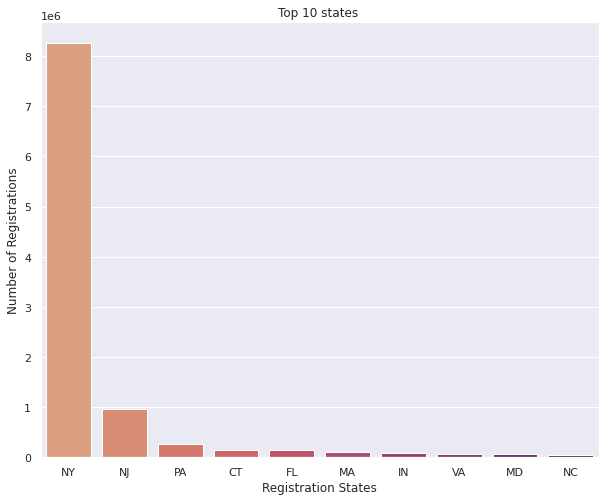

In [ ]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(x = Reg_States_top10.index, y = Reg_States_top10.values, palette="flare")
plt.title('Top 10 states ')
plt.xlabel('Registration States')
plt.ylabel('Number of Registrations')

## **What time of the day has the most number of tickets**

In [ ]:
v_time = data_2016['Violation Time'].value_counts()[0:30]

vt_df = pd.DataFrame()

for i in range(len(v_time)):
  vt = datetime.time(hour= int(v_time.index[i][0:2]),minute = int(v_time.index[i][2:4])).strftime("%H:%M")
  
  if v_time.index[i][4] =="A":
    vt_df = vt_df.append(pd.DataFrame({'Violation Time': str(vt) + " AM", 'Number of Violations': v_time.values[i]}, index=[0]), ignore_index=True)
    # print("Time -", dt, "AM", "& No. of violations -", v_time.values[i])
  else:
    vt_df = vt_df.append(pd.DataFrame({'Violation Time': str(vt) + " PM", 'Number of Violations' : v_time.values[i]}, index=[0]), ignore_index=True)
    # print("Time -", dt,"PM", "& No. of violations -", v_time.values[i])

In [ ]:
vt_df

,Violation Time,Number of Violations
0,08:36 AM,30689
1,11:36 AM,30289
2,11:40 AM,28297
3,09:36 AM,26267
4,08:40 AM,25891
5,11:38 AM,25674
6,09:06 AM,25633
7,09:40 AM,25485
8,11:45 AM,25461
9,11:39 AM,25388


Text(0, 0.5, 'Violation Time')

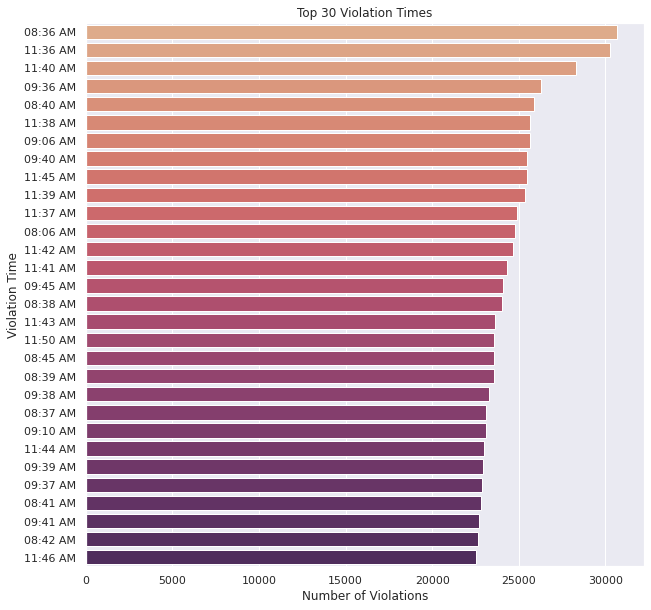

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.barplot( x = 'Number of Violations', y = 'Violation Time', data = vt_df, palette="flare")
plt.title('Top 30 Violation Times')
plt.xlabel('Number of Violations')
plt.ylabel('Violation Time')



# Which month of the year has the most number of tickets

In [ ]:
month = []
for time_stamp in pd.to_datetime(data_2016['Issue Date']):
    month.append(time_stamp.month)
month_count = pd.Series(month).value_counts()
month_count

# Renaming month numbers to month names
months = month_count.rename(index = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May', 6:'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
months

Oct     1097473
Mar     1014485
Sept     940010
Nov      935913
Aug      903252
Apr      901258
July     885401
May      875203
Feb      840944
Jan      815902
Dec      767642
June     649416
dtype: int64

Text(0, 0.5, 'Number of Tickets')

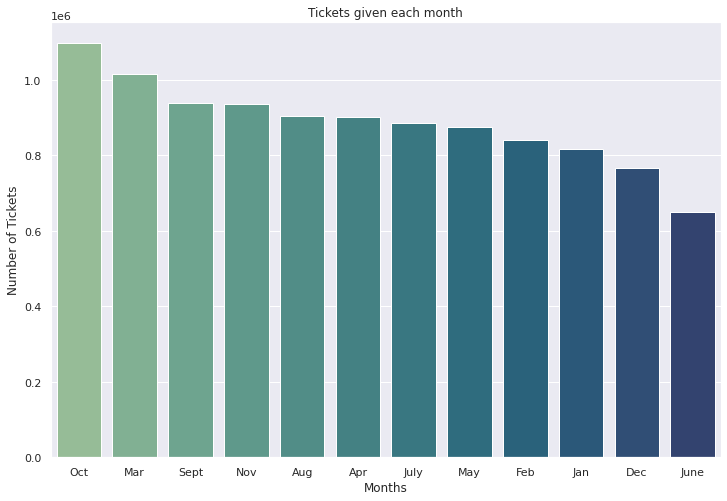

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.barplot(x = months.index, y = months.values, palette='crest')
plt.title('Tickets given each month')
plt.xlabel('Months')
plt.ylabel('Number of Tickets')

In [ ]:
vehicle_Body = data_2016['Vehicle Body Type'].value_counts()[0:20]

In [ ]:
vehicle_Make = data_2016['Vehicle Make'].value_counts()[0:20]

Text(0, 0.5, 'Vehicles Count')

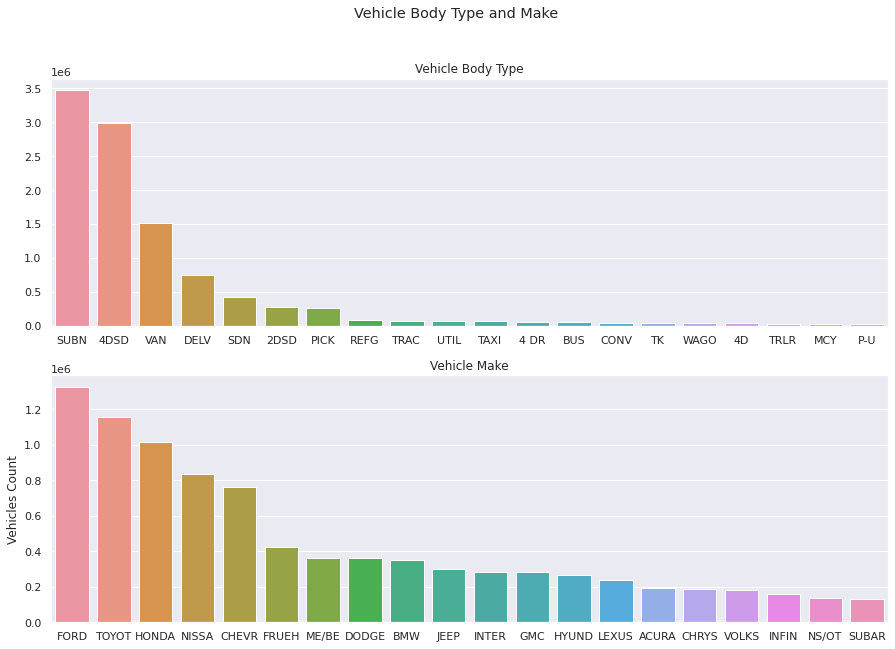

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Vehicle Body Type and Make')

# Vehicle Body Type
plt.ylabel('Vehicles Count')
sns.barplot(ax=axes[0], x=vehicle_Body.index, y=vehicle_Body.values)
axes[0].set_title("Vehicle Body Type")

# Vehicle Make
sns.barplot(ax=axes[1], x=vehicle_Make.index, y=vehicle_Make.values)
axes[1].set_title("Vehicle Make")
plt.ylabel('Vehicles Count')

# Which location has the most number of tickets

In [ ]:
street_wise = data_2016['Street Name'].value_counts()[0:20]

Text(0, 0.5, 'Streets')

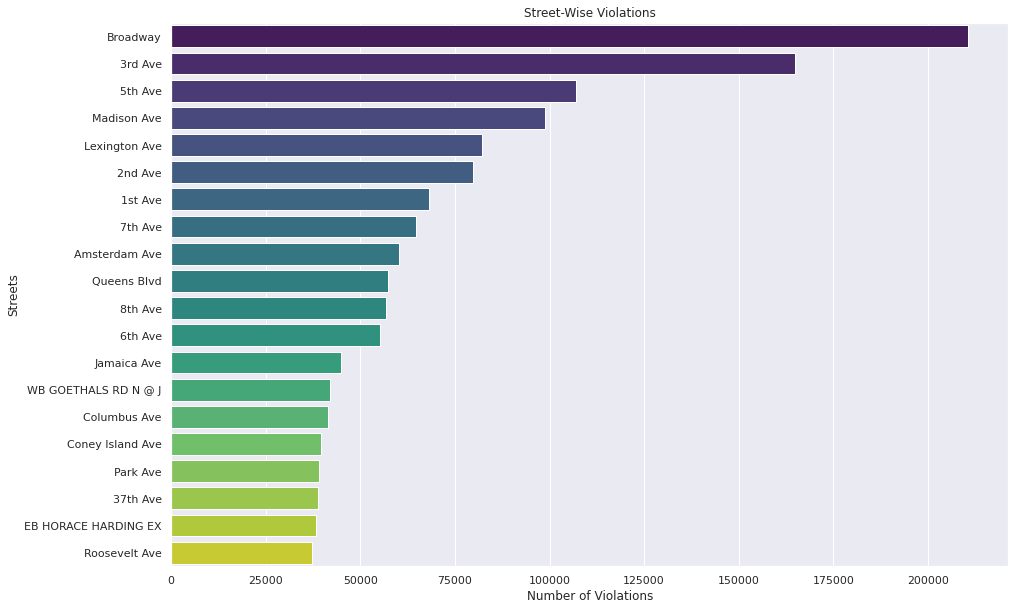

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = street_wise.values, y = street_wise.index, palette='viridis')
plt.title('Street-Wise Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Streets')

# Which violation code has the most number of tickets

In [ ]:
violation_desc = data_2016["Violation Description"].value_counts()[0:20]

Text(0, 0.5, 'Violation Code and Description')

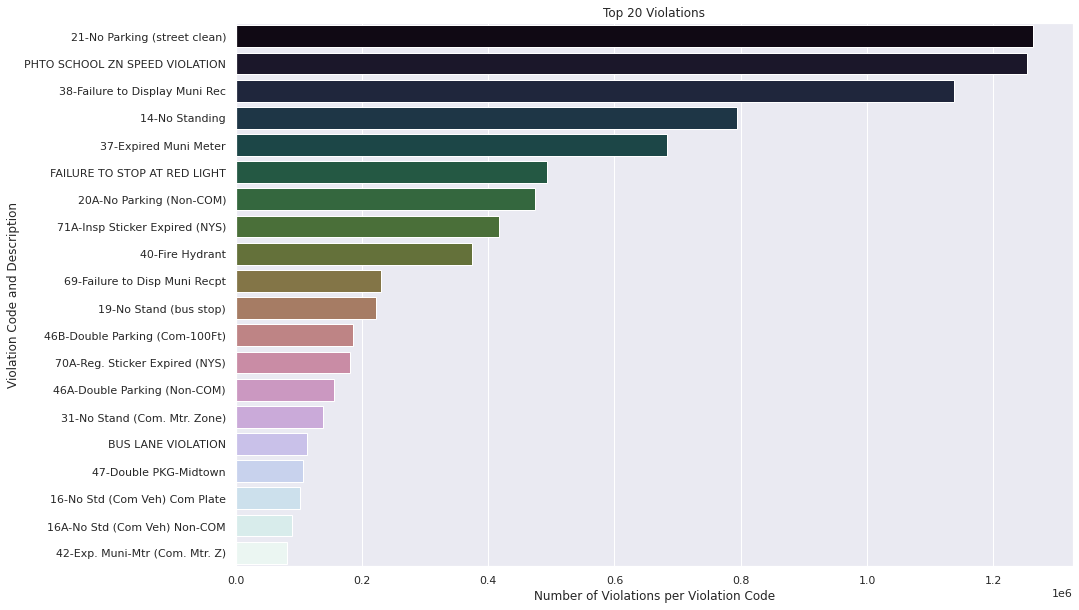

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = violation_desc.values, y = violation_desc.index, palette='cubehelix')
plt.title('Top 20 Violations')
plt.xlabel('Number of Violations per Violation Code')
plt.ylabel('Violation Code and Description')

# Which precinct issues the most number of tickets

In [ ]:
violation_prec = data_2016["Violation Precinct"].value_counts()[0:10]

In [ ]:
issue_prec = data_2016["Issuer Precinct"].value_counts()[0:10]

Text(0.5, 1.0, 'Issuer Precinct')

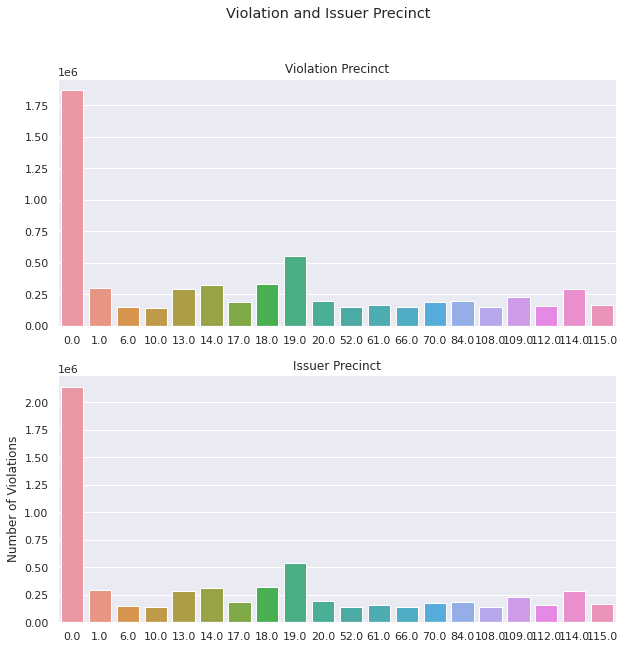

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Violation and Issuer Precinct')

# Vehicle Body Type
plt.ylabel('Number of Violations')
sns.barplot(ax=axs[0], x=violation_prec.index, y=violation_prec.values)
axs[0].set_title("Violation Precinct")

# Vehicle Make
sns.barplot(ax=axs[1], x=issue_prec.index, y=issue_prec.values)
axs[1].set_title("Issuer Precinct")